# Importing necessary modules

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,classification_report

# Path of the folder on your system storing the datasets

In [2]:
%cd C:/Users/divya/Downloads/BMW-Tasks

C:\Users\divya\Downloads\BMW-Tasks


# Read data sets and merge them.
The datasets are read and then merged. The data is then analysed for any duplicates and missing values and the data cleaning process is started.

In [3]:
# csv file 1
df1= pd.read_csv("Task1_1.csv",delimiter = ";")
df1

,ID,UKL,GJAH,ZIK,HUI,ERZ,CDx,BJZHD,NKJUD,LPI,BJKG
0,0,160,oooo,x,oooo,www,5.0,vvvv,80.0,800000.0,qqqq
1,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq
2,2,5,oooo,x,oooo,www,19.0,hh,96.0,960000.0,hh
3,3,9,oooo,NaN,oooo,www,120.0,kkk,0.0,0.0,qqq
4,4,40,oooo,y,oooo,www,0.0,mmm,232.0,2320000.0,qqqq
...,...,...,...,...,...,...,...,...,...,...,...
4065,586,155,oooo,NaN,oooo,www,500.0,sss,0.0,0.0,hhhh
4066,2200,13,oooo,NaN,oooo,www,3.0,yyy,100.0,1000000.0,qqqq
4067,2318,19,rrr,NaN,oooo,pppp,1236.0,sss,455.0,4550000.0,hhhh
4068,1555,74,oooo,x,oooo,www,26726.0,sss,NaN,NaN,qqqq


In [54]:
#DATA CLEANING

In [4]:
# remove the duplicates
df1=df1.drop_duplicates()
df1.shape

(3700, 11)

In [5]:
# csv file 2
df2 = pd.read_csv("Task1_2.csv",delimiter = ";")
df2

,POUG,TRE,ID,ZUB,VOL,UIO,VBNM,Type,OIN
0,1,1.750,0,t,f,uuuu,t,n,17.92
1,0,0.290,1,f,f,wwww,f,n,16.92
2,1,0.000,2,f,f,wwww,t,n,31.25
3,0,0.335,3,f,f,uuuu,f,n,48.17
4,0,0.500,4,t,f,wwww,f,n,32.33
...,...,...,...,...,...,...,...,...,...
4065,14,5.500,3314,f,t,uuuu,t,y,52.83
4066,7,0.750,999,f,t,uuuu,t,y,19.17
4067,0,5.000,2415,t,t,uuuu,f,y,36.75
4068,0,0.835,511,f,t,wwww,f,y,23.25


In [6]:
## remove the duplicates
df2=df2.drop_duplicates()
df2.shape

(3700, 9)

In [142]:
# merge the two data sets on 'ID'
df3 = pd.merge(df1,df2, on ="ID")
df3

,ID,UKL,GJAH,ZIK,HUI,ERZ,CDx,BJZHD,NKJUD,LPI,BJKG,POUG,TRE,ZUB,VOL,UIO,VBNM,Type,OIN
0,0,160,oooo,x,oooo,www,5.0,vvvv,80.0,800000.0,qqqq,1,1.750,t,f,uuuu,t,n,17.92
1,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq,0,0.290,f,f,wwww,f,n,16.92
2,2,5,oooo,x,oooo,www,19.0,hh,96.0,960000.0,hh,1,0.000,f,f,wwww,t,n,31.25
3,3,9,oooo,NaN,oooo,www,120.0,kkk,0.0,0.0,qqq,0,0.335,f,f,uuuu,f,n,48.17
4,4,40,oooo,y,oooo,www,0.0,mmm,232.0,2320000.0,qqqq,0,0.500,t,f,wwww,f,n,32.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,3695,74,oooo,x,oooo,www,26726.0,sss,NaN,NaN,qqqq,5,2.710,f,t,uuuu,t,y,18.75
3696,3696,179,oooo,x,oooo,www,0.0,sss,120.0,1200000.0,qqqq,5,8.500,t,t,uuuu,t,y,23.50
3697,3697,82,oooo,NaN,oooo,www,221.0,vvvv,0.0,0.0,qqqq,12,4.500,t,t,wwww,t,y,34.17
3698,3698,13,oooo,NaN,oooo,www,3.0,yyy,100.0,1000000.0,qqqq,5,3.750,t,t,wwww,t,y,27.83


# Data analysis and data pre-processing

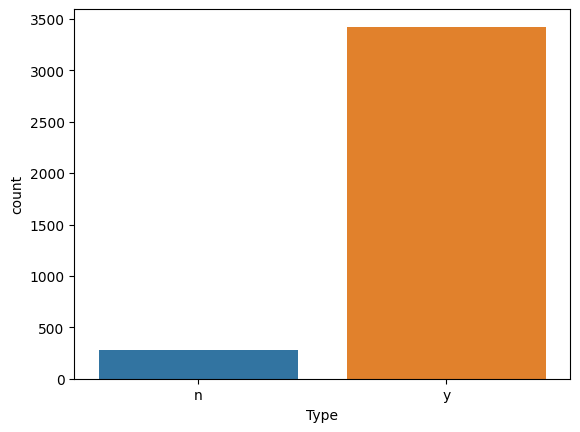

In [145]:
# Number of datapoints for each class.The plot shows a clear imbalance in the dataset.
sns_plot=sn.countplot(x=df3['Type'], data=df3)



In [146]:
# Save the figure as png
fig = sns_plot.get_figure()
fig.savefig("class_imbalance.png")

In [18]:
class_count_n, class_count_y= df3.Type.value_counts()
# Number of datapoints in class 'n'
class_n = df3[df3['Type']=='n']
class_n.shape

(276, 19)

In [17]:
# Number of datapoints in class 'y'
class_y= df3[df3['Type']=='y']
class_y.shape

(3424, 19)

In [26]:
# one hot encoding: converts the categorical data
df3 = pd.get_dummies(df3.drop('ZIK', axis=1), drop_first = True)
df3

,ID,UKL,CDx,NKJUD,LPI,POUG,TRE,OIN,GJAH_oooo,GJAH_rrr,...,BJKG_lll,BJKG_ppp,BJKG_qqq,BJKG_qqqq,BJKG_yy,ZUB_t,VOL_t,UIO_wwww,VBNM_t,Type_y
0,0,160,5.0,80.0,800000.0,1,1.750,17.92,True,False,...,False,False,False,True,False,True,False,False,True,False
1,1,153,0.0,200.0,2000000.0,0,0.290,16.92,False,True,...,False,False,False,True,False,False,False,True,False,False
2,2,5,19.0,96.0,960000.0,1,0.000,31.25,True,False,...,False,False,False,False,False,False,False,True,True,False
3,3,9,120.0,0.0,0.0,0,0.335,48.17,True,False,...,False,False,True,False,False,False,False,False,False,False
4,4,40,0.0,232.0,2320000.0,0,0.500,32.33,True,False,...,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,3695,74,26726.0,NaN,NaN,5,2.710,18.75,True,False,...,False,False,False,True,False,False,True,False,True,True
3696,3696,179,0.0,120.0,1200000.0,5,8.500,23.50,True,False,...,False,False,False,True,False,True,True,False,True,True
3697,3697,82,221.0,0.0,0.0,12,4.500,34.17,True,False,...,False,False,False,True,False,True,True,True,True,True
3698,3698,13,3.0,100.0,1000000.0,5,3.750,27.83,True,False,...,False,False,False,True,False,True,True,True,True,True


In [28]:
# 'x' features that will be used to train the machine learning model
x = df3.drop('Type_y', axis=1)
print(x.shape)
# 'y' target variable
y= df3['Type_y']
print(y.shape)


(3700, 36)
(3700,)


In [30]:
#Standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,ID,UKL,CDx,NKJUD,LPI,POUG,TRE,OIN,GJAH_oooo,GJAH_rrr,...,BJKG_hhhh,BJKG_lll,BJKG_ppp,BJKG_qqq,BJKG_qqqq,BJKG_yy,ZUB_t,VOL_t,UIO_wwww,VBNM_t
0,0.000000,0.893258,0.00005,0.068966,0.068966,0.014925,0.061404,0.062707,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.000270,0.853933,0.00000,0.172414,0.172414,0.000000,0.010175,0.047669,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.000541,0.022472,0.00019,0.082759,0.082759,0.014925,0.000000,0.263158,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.000811,0.044944,0.00120,0.000000,0.000000,0.000000,0.011754,0.517594,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001081,0.219101,0.00000,0.200000,0.200000,0.000000,0.017544,0.279398,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,0.998919,0.410112,0.26726,NaN,NaN,0.074627,0.095088,0.075188,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3696,0.999189,1.000000,0.00000,0.103448,0.103448,0.074627,0.298246,0.146617,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3697,0.999459,0.455056,0.00221,0.000000,0.000000,0.179104,0.157895,0.307068,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
3698,0.999730,0.067416,0.00003,0.086207,0.086207,0.074627,0.131579,0.211729,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [31]:
# Dealing with missing values using KNN imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 3)
x = pd.DataFrame(imputer.fit_transform(x),columns = x.columns)

In [45]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3,stratify = y, random_state=42)

In [125]:
# SelectKBest method to select the k best features to train the classifiers
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored k features

select_feature = SelectKBest(chi2, k=17).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.17556547e-01 7.19413215e-01 9.34818152e+00 1.01958193e+00
 5.08665104e+00 3.96040469e+01 2.01031730e-01 6.39580328e+01
 1.83288758e+01 4.79491139e+00 1.23637254e+01 2.58019923e-01
 9.73141138e+00 1.23633710e+00 2.20314973e-01 6.11336689e-01
 1.58005283e+01 5.81548171e+01 9.74559200e+00 1.89617851e+00
 4.90115767e-01 8.05173133e-01 4.72291093e-01 1.05366197e-01
 1.52012697e+00 1.10267616e+02 6.72021866e-02 5.30527294e+01]
Feature list: Index(['UKL', 'NKJUD', 'TRE', 'OIN', 'GJAH_oooo', 'GJAH_rrr', 'BJZHD_ggg',
       'BJZHD_hh', 'BJZHD_kkk', 'BJZHD_lll', 'BJZHD_mmm', 'BJZHD_ooo',
       'BJZHD_sss', 'BJZHD_vvvv', 'BJZHD_xxx', 'BJZHD_yyy', 'BJZHD_zzz',
       'BJKG_hh', 'BJKG_hhhh', 'BJKG_lll', 'BJKG_ppp', 'BJKG_qqq', 'BJKG_qqqq',
       'BJKG_yy', 'ZUB_t', 'VOL_t', 'UIO_wwww', 'VBNM_t'],
      dtype='object')


In [126]:
# Transform the train and test set of features to selected features by SelectKBest
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

In [127]:
# Use inbuilt sklearn method(Synthetic Minor Oversampling Technique) that oversamples the class that is underrepresented.
from imblearn.over_sampling import SMOTE

counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train_sm, y_train_sm : resampling the under represented data
X_train_sm, y_train_sm = smt.fit_resample(x_train_2, y_train)

counter = Counter(y_train_sm)
print('After',counter)


Before Counter({True: 3424, False: 276})
After Counter({True: 2397, False: 2397})


# Machine Learning models

 K nearest neighbour algorithm

Accuracy is:  0.9882882882882883
              precision    recall  f1-score   support

       False       1.00      0.84      0.92        83
        True       0.99      1.00      0.99      1027

    accuracy                           0.99      1110
   macro avg       0.99      0.92      0.95      1110
weighted avg       0.99      0.99      0.99      1110



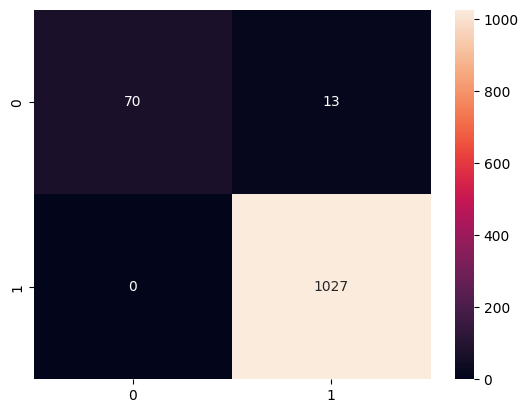

In [130]:
from sklearn import neighbors
clf_knn = neighbors.KNeighborsClassifier(3, weights='distance')
clf_knn.fit(X_train_sm, y_train_sm)
ac = accuracy_score(y_test,clf_knn.predict(x_test_2))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_knn.predict(x_test_2))
sn.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test,clf_knn.predict(x_test_2)))
clf_rep_knn=classification_report(y_test,clf_knn.predict(x_test_2),output_dict= True)


<Axes: >

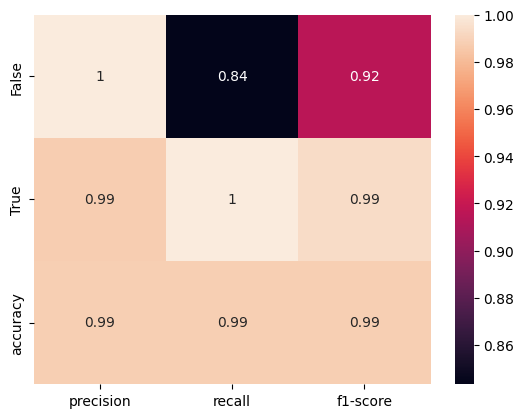

In [132]:
# matrix showing precision,recall and f1 score
sn.heatmap(pd.DataFrame(clf_rep_knn).iloc[:-1, :-2].T, annot=True)

Support Vector Machine classifier

Accuracy is:  0.9162162162162162
              precision    recall  f1-score   support

       False       0.47      0.83      0.60        83
        True       0.99      0.92      0.95      1027

    accuracy                           0.92      1110
   macro avg       0.73      0.88      0.78      1110
weighted avg       0.95      0.92      0.93      1110



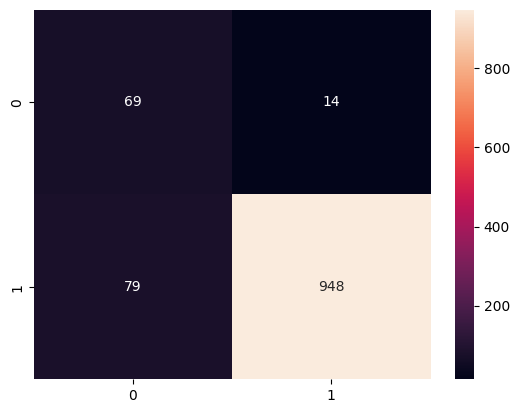

In [133]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train_sm, y_train_sm)

ac = accuracy_score(y_test,clf_svm.predict(x_test_2))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_svm.predict(x_test_2))
sn.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test,clf_svm.predict(x_test_2)))


Decision Tree

Accuracy is:  0.9891891891891892
              precision    recall  f1-score   support

       False       1.00      0.86      0.92        83
        True       0.99      1.00      0.99      1027

    accuracy                           0.99      1110
   macro avg       0.99      0.93      0.96      1110
weighted avg       0.99      0.99      0.99      1110



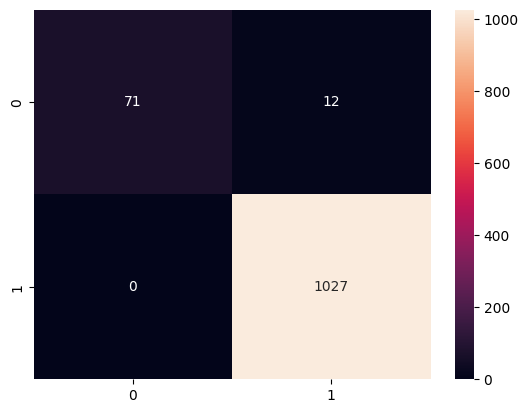

In [134]:
from sklearn import tree
clf_dt= tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train_sm, y_train_sm)

ac = accuracy_score(y_test,clf_dt.predict(x_test_2))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_dt.predict(x_test_2))
sn.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test,clf_dt.predict(x_test_2)))
clf_rep_dt=classification_report(y_test,clf_dt.predict(x_test_2),output_dict= True)

Random Forest classifier

Accuracy is:  0.9900900900900901
              precision    recall  f1-score   support

       False       1.00      0.87      0.93        83
        True       0.99      1.00      0.99      1027

    accuracy                           0.99      1110
   macro avg       0.99      0.93      0.96      1110
weighted avg       0.99      0.99      0.99      1110



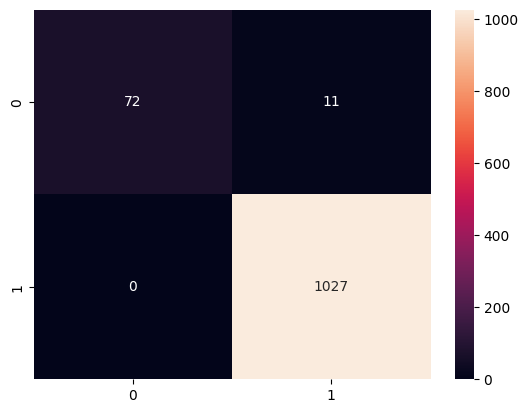

In [135]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train_sm,y_train_sm)

ac = accuracy_score(y_test,clf_rf.predict(x_test_2))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test_2))
sn.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test,clf_rf.predict(x_test_2)))
